# 4 Wine Classification with Logistic Regression

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.special import *
from save_csv import *

In [155]:
def shuffle_train_val_split(val_amt=0, percent=0):
    data = loadmat("data.mat")
    total_num_ex = data["X"].shape[0]
    shuffle = np.random.permutation(total_num_ex) #shuffle before split
    data_xtrain, data_ytrain = data["X"][shuffle], \
    data["y"][shuffle] #split
    if not val_amt: #split by fixed number or percentage
        val_amt = int(percent * total_num_ex)
    data_xval, data_yval = data_xtrain[:val_amt,:], data_ytrain[:val_amt,:]
    data_xtrain, data_ytrain = data_xtrain[val_amt:,:], data_ytrain[val_amt:,:]
    return data_xtrain, data_ytrain, data_xval, data_yval

def sigmoid(values):
    return expit(values)

def predict(X,w,mode="train"):
    predictions = sigmoid(np.dot(X,w))
    if mode == "test":
        predictions = (predictions >= 0.5).astype(int)
        results_to_csv(predictions)
        print("test predictions saved")
    return predictions

def logres_cost_reg(X,y,theta,lambd):
    m = X.shape[0]
    regularization = (lambd/(2*m)) * np.sum(np.square(theta[1:]))
    predictions = predict(X,theta)
    y = np.squeeze(y,axis=1)
    J = ((-1.0/m) * (np.sum(np.dot(-y, np.log(predictions)) + xlog1py(1-y, -predictions)))) + regularization
    return J

def gradientdescent_reg_optimize(iterations,theta,lambd,alpha,GD_type="batch"):
    costs = [0] * iterations
    if len(lambd) == 1:
        lambd = [lambd[0]] * iterations
    next_theta = theta.copy()
    for i in range(iterations):
        if GD_type == "batch":
            new_theta = batchGD_reg_iteration(wine_xtrain,wine_ytrain,theta,lambd[i],alpha)
        elif GD_type == "stochastic":
            new_theta = stochasticGD_reg_iteration(wine_xtrain,wine_ytrain,theta,lambd[i],alpha)
        costs[i] = logres_cost_reg(wine_xtrain,wine_ytrain,theta,lambd[i])
        theta = new_theta
    return theta, costs

In [156]:
wine_xtrain, wine_ytrain, wine_xval, wine_yval = shuffle_train_val_split(percent=0.2)
m1, n1 = wine_xtrain.shape
m2, n2 = wine_xval.shape
wine_xtrain = np.concatenate([np.ones((m1, 1)), wine_xtrain], axis=1)
wine_xval = np.concatenate([np.ones((m2, 1)), wine_xval], axis=1)

\pagebreak

## 4.1 batch gradient descent update equation for logistic regression

### TODO: insert handwritten image here for derivations

In [177]:
alpha = 0.001
lambd = [0.1] #actually lambda
theta = np.random.randn(n1+1)
iterations = 1000

def batchGD_reg_iteration(X,y,theta,lambd,alpha):
    y = np.squeeze(y,axis=1)
    gradients = (-1/len(y) * np.dot(X.T,(y-sigmoid(np.dot(X,theta))))).reshape(theta.shape)
    gradients[1:] += (lambd/len(y) * theta[1:])
    new_theta = theta - alpha*gradients
    return new_theta

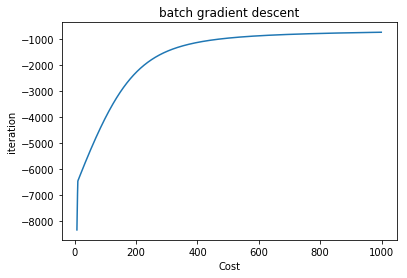

In [178]:
theta, costs = gradientdescent_reg_optimize(iterations,theta,lambd,alpha,"batch")
plt.title("batch gradient descent")
plt.xlabel("Cost")
plt.ylabel("iteration")
plt.plot([i for i in range(iterations)], costs);

## 4.2 stochastic gradient descent update equation for logistic regression

### TODO: insert handwritten image here for derivations

In [179]:
alpha = 0.001
lambd = [0.1] #actually lambda
theta = np.random.randn(n1+1)
iterations = 1000

def stochasticGD_reg_iteration(X,y,theta,lambd,alpha):
    new_theta = theta.copy()
    y = np.squeeze(y,axis=1)
    np.random.shuffle(X)
    for i in range(len(y)):
        gradients = np.dot(y[i]-sigmoid(np.dot(X[i,:],theta)),X[i,:])
        gradients[1:] += (lambd/len(y) * theta[1:])
        new_theta = theta - alpha*gradients
    return new_theta

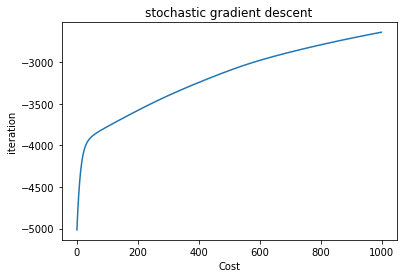

In [180]:
theta, costs = gradientdescent_reg_optimize(iterations,theta,lambd,alpha)
plt.title("stochastic gradient descent")
plt.xlabel("Cost")
plt.ylabel("iteration")
plt.plot([i for i in range(iterations)], costs);

#### The difference in converge between batch and stochastic gradient descent is that stochastic converges faster (and more consistently between different runs).

## 4.3 stochastic gradient descent with decaying learning rate

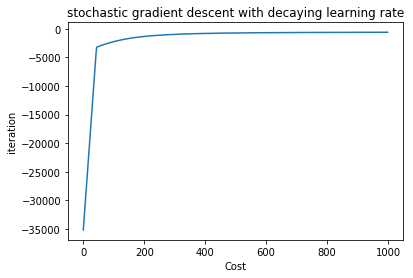

In [186]:
alpha = 0.001
init_lambd = 0.1
iterations = 1000
lambd = [init_lambd/(i+1) for i in range(iterations)] #actually lambda
theta = np.random.randn(n1+1)

theta, costs = gradientdescent_reg_optimize(iterations,theta,lambd,alpha)
plt.title("stochastic gradient descent with decaying learning rate")
plt.xlabel("Cost")
plt.ylabel("iteration")
plt.plot([i for i in range(iterations)], costs);

#### Based off my results with a decaying learning rate, it does seem like a better approach than a constant rate.

In [60]:
# print("val acc",np.mean(predict(wine_xval,theta,"test") == wine_yval))